# k-Means Clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

# Load make_classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [ ]:
# Classify by color
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    else:
        return "blue"

c = [colors(label) for label in y]

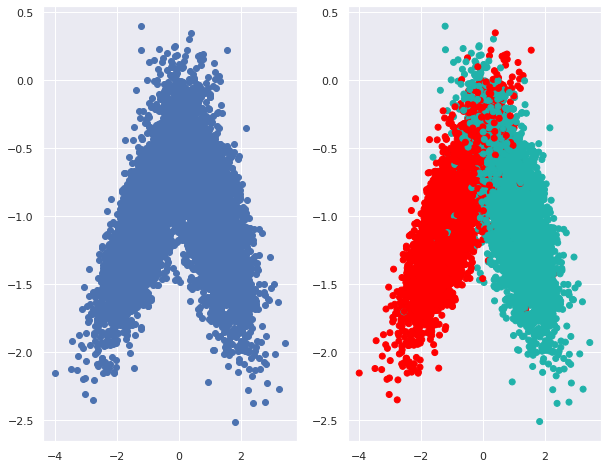

In [ ]:
# Visualization of the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
ax1.scatter(X[:,0], X[:,1])
ax2.scatter(X[:,0], X[:,1], c = c)
plt.show()

In [ ]:
centroids = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centroids.append(point)

## Visualization of initial centroids

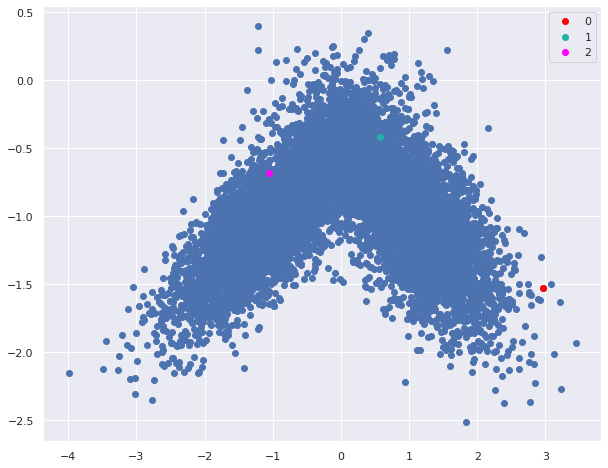

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
plt.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])
plt.legend()
plt.show()

In [ ]:
def distance(i, X, centroid):
    return np.sqrt(sum((X[i, j] - centroid[j])**2 for j in range(2)))

def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroid) for centroid in centroids])
    label = np.argmin(distances)
    return label

def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

## Plotting Clusters

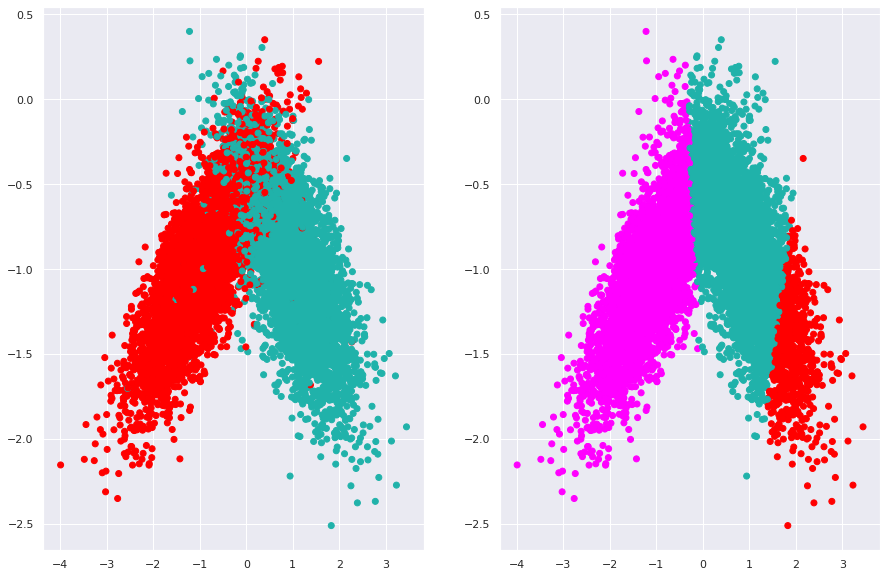

In [ ]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
ax2.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])

plt.show()

## Updating Centroids

In [ ]:
def update_centroids(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

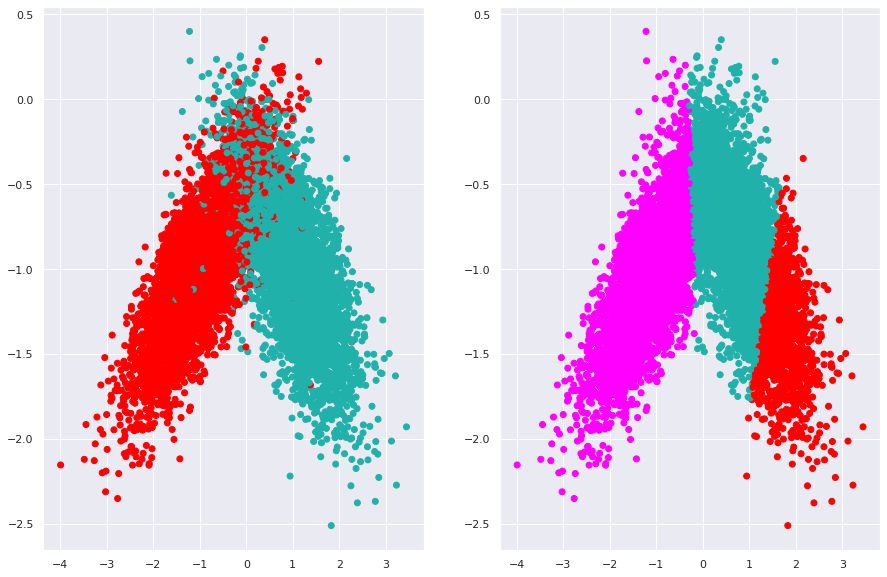

In [ ]:
new_centroids = update_centroids(X, centroids)
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

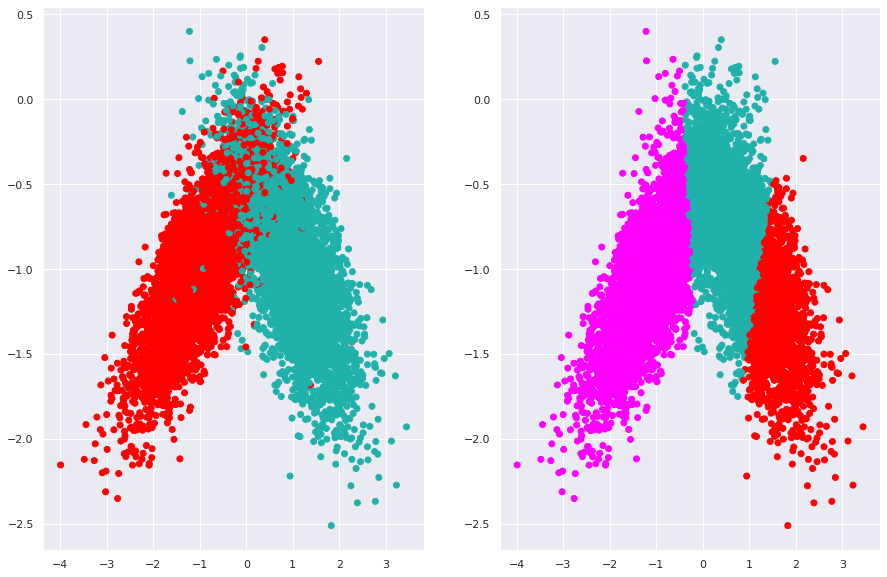

In [ ]:
new_centroids = update_centroids(X, new_centroids)
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

The updated centroids slightly changes the classification with more color red.

## Plotting clusters using k-means function

In [ ]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centroids(X, centers)

    return centers

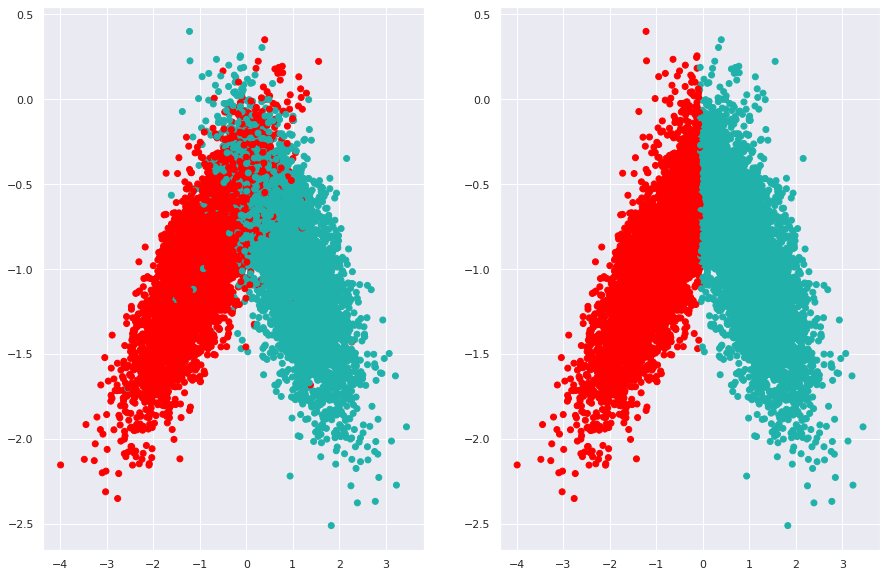

In [ ]:
centroids = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

## Error Analysis

In [30]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, current_labels))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4980
           1       0.91      0.94      0.93      5020

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



According to the plot we are able to see that k-means clustering is sufficient enough to partition the dataset into two non-overlapping subgroups.